In [1]:
import csv
import numpy as np
import ROOT as rt
import os
from glob import glob
import math

Welcome to JupyROOT 6.14/04


In [8]:
xtalk = rt.TMultiGraph()
sensL = rt.TGraphErrors(1)
# ov= [26.5,27,27.5, 28,28.5,29,29.5,30]
# J_33_5 = [0.04158259273816912, 0.0640723417168874, 0.09872842853981684, 0.1343373031435539, 0.16012499945802755, 0.20156010128521568, 0.2617639779447024,0.39483356619310395]
# J_33_4 = [0.04158259273816912,0.06357163463048571,0.09872842889965266,0.1343424265597158,0.1601249990044154,0.20155854519623304,0.2617565853479066,0.39483356619310395]
# J_33_3 = [0.043903627125962394,0.07848894201109773,0.1081529341974125,0.13321378626998354,0.1964421914368036,0.228261984054054,0.27225093863119754,0.47744978120063464]
# J_33_2 = [0.03507379845259262,0.06418442991887885,0.09980656517385941,0.1522167437205545,0.1809331058403753,0.22833019631299106,0.2621966214640237,0.2892999650046042]
ov = [27.5,28,28.5,29,29.5,30]
n = len(ov)

C_33_1 = [0.02067508287198355,0.02026372211804417,0.038109134330965744,0.0318,0.04336778102641281,0.04904450267996685]
sensL.SetPoint(0,27.8,3)
# gr5 = rt.TGraphErrors(n)
# gr4 = rt.TGraphErrors(n)
# gr3 = rt.TGraphErrors(n)
# gr2 = rt.TGraphErrors(n)
# gr = [gr5,gr4,gr3,gr2]
c1=rt.TGraphErrors(n)
gr = [c1]
# J_33_5 = np.array(J_33_5)*100
# J_33_4 = np.array(J_33_4)*100
# J_33_3 = np.array(J_33_3)*100
# J_33_2 = np.array(J_33_2)*100

C_33_1 = np.array(C_33_1)*100

for i in range(n):
#     gr5.SetPoint(i,ov[i], J_33_5[i])
#     gr4.SetPoint(i,ov[i], J_33_4[i])
#     gr3.SetPoint(i,ov[i], J_33_3[i])
#     gr2.SetPoint(i,ov[i], J_33_2[i])
    c1.SetPoint(i,ov[i],C_33_1[i])
xtalk.Add(c1)
xtalk.Add(sensL)
# xtalk.Add(gr4)
# xtalk.Add(gr3)
# xtalk.Add(gr2)
# xtalk.Add(gr5)




Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_xtalk


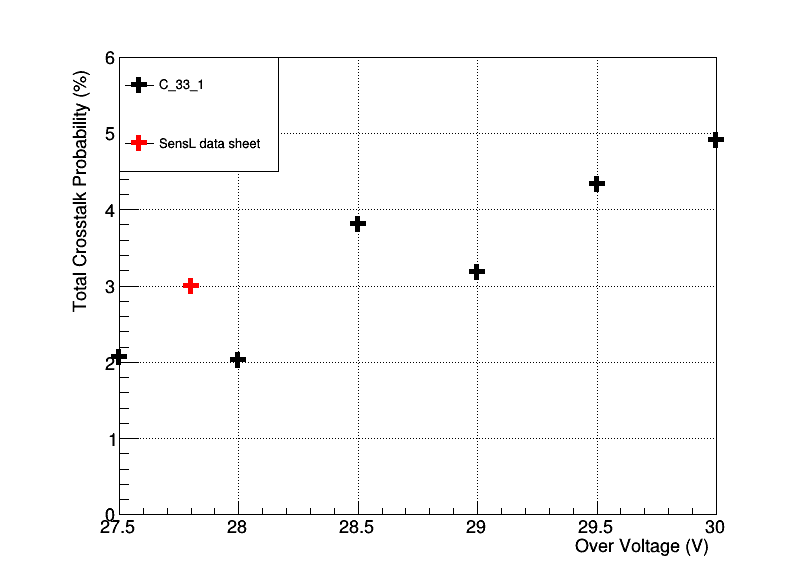

In [10]:
canvas = rt.TCanvas('c_xtalk', 'c_xtalk', 800, 600)
legend = rt.TLegend(0.15,0.70,0.35,0.9);
# legend_entry = ['J_33_5','J_33_4','J_33_3','J_33_2']
legend_entry = ['C_33_1']
xtalk.SetTitle("")
xtalk.GetXaxis().SetTitle('Over Voltage (V)')
xtalk.GetYaxis().SetTitle('Total Crosstalk Probability (%)')

for i in range(len(gr)):
    gr[i].SetMarkerStyle(34)
    gr[i].SetMarkerSize(2)
    gr[i].SetMarkerColor(i+1)
    legend.AddEntry(gr[i],legend_entry[i])

sensL.SetMarkerStyle(34)
sensL.SetMarkerSize(2)


sensL.SetMarkerColor(2)
legend.AddEntry(sensL,"SensL data sheet")
xtalk.Draw("AP")
# rt.gStyle.SetOptFit(000002200)
# gain.GetXaxis().SetRangeUser(25,30)
xtalk.GetYaxis().SetRangeUser(0,6)
canvas.SetLeftMargin(0.15)
canvas.SetGrid()
canvas.Draw()

legend.Draw()
